In [1]:
import pandas as pd

csv = 'driving_log.csv'
data = pd.read_csv(csv)

In [2]:
from sklearn.model_selection import train_test_split

VALIDATION_SPLIT = 0.2  # 20% 验证集

train_data, valid_data = train_test_split(
    range(len(data)), test_size=VALIDATION_SPLIT, random_state=1)

In [3]:
from keras.models import load_model

model_normal = load_model('train-normal/model/model.h5')
model_dropout = load_model('train-dropout/model/model.h5')
model_vgg16 = load_model('train-vgg16/model/model.h5')
model_vgg19 = load_model('train-vgg19/model/model.h5')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
from vis.visualization import visualize_saliency, overlay
from vis.utils import utils
import matplotlib.cm as cm

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

In [6]:
import numpy as np

CROP = range(60, 140)
RESIZE = (200, 66)

def process(image):
    image = cv2.imread(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image[CROP]
    image = cv2.resize(image, RESIZE)
    return image

X_test = []
y_test = []

for index in valid_data:
    image = process(data['center'][index].strip())
    steer = data['steering'][index]

    X_test.append(image)
    y_test.append(steer)

In [7]:
image = X_test[555]

## train-normal

(-0.5, 199.5, 65.5, -0.5)

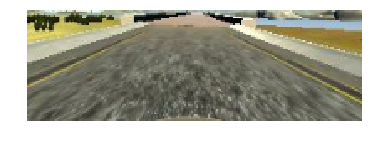

In [8]:
# 原始图
plt.imshow(image, cmap='gray')
plt.axis('off')

In [9]:
layer_idx = utils.find_layer_idx(model_normal, 'conv2d_5')
grads = visualize_saliency(model_normal, layer_idx=layer_idx, filter_indices=None,
                               seed_input=image, backprop_modifier='guided')
jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)

(-0.5, 199.5, 65.5, -0.5)

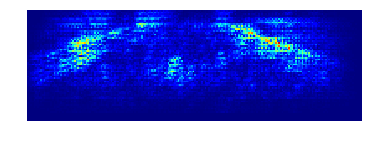

In [10]:
# 热力图
plt.imshow(jet_heatmap)
plt.axis('off')

(-0.5, 199.5, 65.5, -0.5)

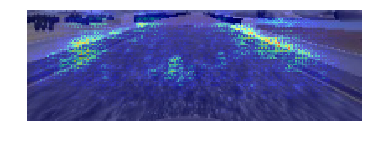

In [11]:
# 叠加图
plt.imshow(overlay(jet_heatmap, image))
plt.axis('off')

## train-dropout

(-0.5, 199.5, 65.5, -0.5)

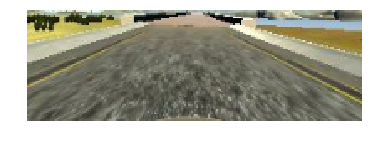

In [12]:
# 原始图
plt.imshow(image, cmap='gray')
plt.axis('off')

In [13]:
layer_idx = utils.find_layer_idx(model_dropout, 'conv2d_5')
grads = visualize_saliency(model_dropout, layer_idx=layer_idx, filter_indices=None,
                               seed_input=image, backprop_modifier='guided')
jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)

(-0.5, 199.5, 65.5, -0.5)

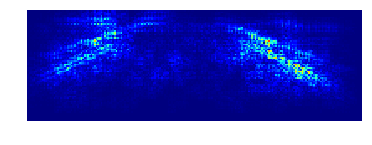

In [14]:
# 热力图
plt.imshow(jet_heatmap)
plt.axis('off')

(-0.5, 199.5, 65.5, -0.5)

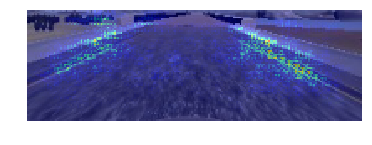

In [15]:
# 叠加图
plt.imshow(overlay(jet_heatmap, image))
plt.axis('off')

In [16]:
import numpy as np

CROP = range(60, 140)
RESIZE = (128, 128)

def process(image):
    image = cv2.imread(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image[CROP]
    image = cv2.resize(image, RESIZE)
    return image

X_test = []
y_test = []

for index in valid_data:
    image = process(data['center'][index].strip())
    steer = data['steering'][index]

    X_test.append(image)
    y_test.append(steer)

In [17]:
image = X_test[555]

## VGG 16

(-0.5, 127.5, 127.5, -0.5)

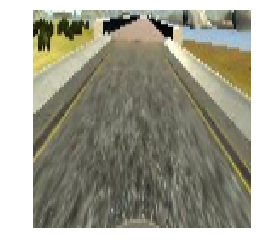

In [18]:
# 原始图
plt.imshow(image, cmap='gray')
plt.axis('off')

In [19]:
layer_idx = utils.find_layer_idx(model_vgg16, 'block5_conv3')
grads = visualize_saliency(model_vgg16, layer_idx=layer_idx, filter_indices=None,
                               seed_input=image, backprop_modifier='guided')
jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)

(-0.5, 127.5, 127.5, -0.5)

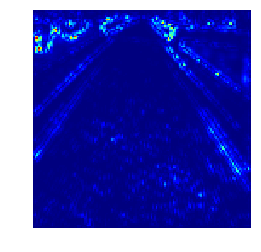

In [20]:
# 热力图
plt.imshow(jet_heatmap)
plt.axis('off')

(-0.5, 127.5, 127.5, -0.5)

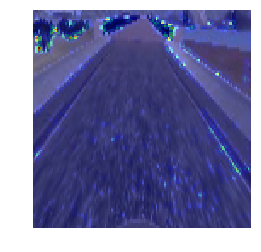

In [21]:
# 叠加图
plt.imshow(overlay(jet_heatmap, image))
plt.axis('off')

## VGG 19

(-0.5, 127.5, 127.5, -0.5)

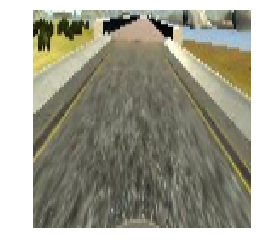

In [22]:
# 原始图
plt.imshow(image, cmap='gray')
plt.axis('off')

In [23]:
layer_idx = utils.find_layer_idx(model_vgg19, 'block5_conv4')
grads = visualize_saliency(model_vgg19, layer_idx=layer_idx, filter_indices=None,
                               seed_input=image, backprop_modifier='guided')
jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)

(-0.5, 127.5, 127.5, -0.5)

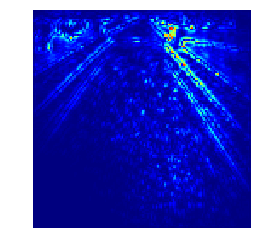

In [24]:
# 热力图
plt.imshow(jet_heatmap)
plt.axis('off')

(-0.5, 127.5, 127.5, -0.5)

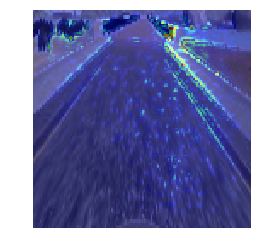

In [25]:
# 叠加图
plt.imshow(overlay(jet_heatmap, image))
plt.axis('off')